<section id="title-slide">
  <h1 class="title">The ABC of Computational Text Analysis</h1>
  <h2 class="subtitle">#10: NLP with Python</h2>
  <p class="author">Alex Flückiger</p><p class="date">May 6/20 2022</p>
</section>

In [ ]:
%%HTML
<style>
div.prompt {display:none}
</style>

# Overview Analysis

- explore differences between two corpora 
    - using politcial party programmes
- visualize term frequency over time
  - using 1 August speeches by Swiss Federal Councillors

# Do Natural Language Processing (NLP)

## Modules
#### Standing of the Shoulders of Giants
- [spaCy](https://spacy.io/usage/spacy-101): use or build state-of-the-art NLP pipeline
- [textaCy](https://textacy.readthedocs.io): do high-level analysis, extends spaCy
- [scattertext](https://github.com/JasonKessler/scattertext): visualize differences across corpora
- [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html): analyze tabular data 
- [plotnine](https://plotnine.readthedocs.io): visualize anything (*ggplot for Python*)

# Importing Modules

various ways of importing

In [ ]:
# standard import
import textacy
import spacy

# import with a short name
import scattertext as st 
import pandas as pd

# import all specific/all o§bjects from a module
from pathlib import Path
from plotnine import *
import textacy.vsm

# Basic NLP
Process a single document

In [ ]:
# example text (to read from a file see below)
text = "Apple is looking at buying U.K. startup for $1 billion"

# load a language specific model
en = textacy.load_spacy_lang("en_core_web_sm")

# process document (tokenizing, tagging, parsing)
doc = textacy.make_spacy_doc(text, lang=en)

## Linguistic Features
Features per token and their dependencies

In [ ]:
# visualize dependencies
spacy.displacy.render(doc, style="dep")

## Get linguistic features

In [ ]:
# iterate over tokens of a document
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_,
            token.dep_, token.shape_, token.is_alpha, token.is_stop)

## Named Entity Recognition (NER)

In [ ]:
# visualize named entities
spacy.displacy.render(doc, style="ent")

In [ ]:
# iterate over named entities of a document
for ent in doc.ents:
    print(ent.text, f"{ent.label_} ({spacy.explain(ent.label_)})" )

## Read from a file

In [ ]:
# alternatively, read from a single txt file 
f_text = '../data/swiss_party_programmes/txt/sp_programmes/1920_parteiprogramm_d.txt'
text = textacy.io.read_text(f_text)

# show content
# special generator syntax as text is read just-in-time (stream individual lines)
print(next(text)[:200])

# Working with a Corpus

## Steps to create a Corpus

How to make a corpus from text files?

1. list all files of a folder 
2. read file content
3. parse metadata from file name
4. return each document sequentially

&rarr; wrap all this in a function `get_texts()`

## Define Function

In [ ]:
def get_texts(dir_texts):
    """
    Sequentially stream all documents from a given folder,
    including metadata.
    """
    p = Path(dir_texts) # set base dir
    
    # iterate over all documents
    for fname in p.glob('**/*.txt'):
        
        print('Parsing file:', fname.name)
        
        content = next(textacy.io.text.read_text(fname))
        # join lines as there are hard line-breaks
        content = content.replace('\n', ' ')
        # further modify the text content here if needed

        # parse year from filename and set a metadata
        # example: 1920_parteiprogramm_d.txt --> year=1920
        try:
            year = int(fname.name.split('_')[0])
        except ValueError:
            print('WARNING: Parsing meta data failed:', fname.name)
            continue

        # add more metadata here if needed
        metadata = {'fname': fname.name, 'year': year}
        
        # return documents one after another (sequentially)
        yield (content, metadata)

## Create a Corpus from TXT
Process documents and create corpus

In [ ]:
# stream texts from a given folder
dir_texts = '../data/swiss_party_programmes/txt/sp_programmes/'
texts = get_texts(dir_texts)

# load German language model
de = textacy.load_spacy_lang("de_core_news_sm")

# create corpus from processed documents
corpus = textacy.Corpus(de, data=texts)

# Basic Corpus Statistics

In [ ]:
print('# documents:', corpus.n_docs)
print('# sentences:', corpus.n_sents)
print('# tokens:', corpus.n_tokens)

## Export Word Counts

In [ ]:
# get lowercased and filtered corpus vocabulary
vocab = corpus.word_counts(as_strings=True, normalize= 'lower', filter_stops = True, filter_punct = True, filter_nums = True)

# sort vocabulary by descending frequency
vocab_sorted = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

# write to file, one word and its frequency per line
fname = '../analysis/vocab_frq.txt'
with open(fname, 'w') as f:   
    for word, frq in vocab_sorted:
        line = f"{word}\t{frq}\n"
        f.write(line)

vocab_sorted[:5]

# Working with Subcorpus

Interested in a group of documents only?

In [ ]:
# select the first document in corpus
first_doc = corpus[0]
first_doc._.meta

In [ ]:
# function to filter by metadata, e.g. publication year after 1900
def filter_func(doc):
    return doc._.meta.get("year") > 1900

# create new corpus after applying filter function
subcorpus = textacy.corpus.Corpus(de, data=corpus.get(filter_func))

subcorpus.n_docs, corpus.n_docs

# Key Word in Context (KWIC)

show words in their original context

In [92]:
# iterate over documents and print matches
# you can use regular expressions as keyword
for doc in corpus:
    results = textacy.text_utils.keyword_in_context(doc.text, keyword = '(Ausland|Inland)', ignore_case = True, window_width = 50, print_only = True)
    for match in results:
        print(doc.text)

wärts beziehen und für seine Industrieprodukte im  Ausland  Absatz suchen muss, deshalb von allen Schwankunge
 Unterstützung von in Not geratenen Schweizern im  Ausland . Unterstützung und Förderung aller Bestrebungen, 
eaktion, weil die Schweiz in mancher Hinsicht vom  Ausland  abhängig und weltweiten Zwängen ausgesetzt ist. U
eren multinational. Produktionsstätten werden ins  Ausland  verlagert und einheimische Betriebe von multinati
chränkungen. Die Schweiz ist nicht nur selbst vom  Ausland  abhängig, sie schafft auch Abhängigkeiten. Wie an
ine Beschränkung der Futtermittel-lmporte aus dem  Ausland .  39  (26) Landwirtschaftspolitik  ❑ Die Einkomme
piel einer wirksamen Massnahme. 2. Das Risiko der  Ausland abhängigkeit der Energieversorgung soll reduziert 
 der Radioaktivität eine untragbare Hypothek, die  Ausland abhängigkeit (Uran) enorm und die Sicherheit (Unfa
te und landwirtschaftlichen Erzeugnisse Absatz im  Ausland e suchen muss und deshalb von allen Schwankungen u
Interesse 

# Export Results to File

collect any information and write to file
- particular terms
- Named Entities (NE)
- linguistic constructions
...

In [93]:
results = []

for doc in corpus:
    for sent in doc.sents:
        if 'Armut' in sent.text:
            # match contains the sentence where the term occurs, preceded by the filename (tab-separated)
            match = f"{doc._.meta['fname']}\t{sent.text}"
            results.append(match)

fname = '../analysis/sents_poverty.txt'
with open(fname, 'w') as f:
    f.write('\n'.join(results))

print(results[0])

1920_parteiprogramm_d.txt	Durch die Befriedigung der Bedürfnisse aller Arbeitenden und die Fürsorge der Gesellschaft für alle Arbeitsunfähigen werden Armut und Not, Verbrechen und Prostitution, die in den Zuständen des Kapitalismus ihren Nährboden fanden, als gesellschaftliche Erscheinung verschwinden.


# Export Corpus
Save your dataset as csv

In [95]:
# merge metadata and actual content for each document in the corpus
# ugly, verbose syntax to merge two dictionaries
data = [{**doc._.meta, **{'text': doc.text}} for doc in corpus]

# export corpus as csv
f_csv = '../data/swiss_party_programmes/corpus_party_programmes.csv'
textacy.io.csv.write_csv(data, f_csv, fieldnames=data[0].keys())

# csv format is the best to load in scattertext
data

[{'fname': '1920_parteiprogramm_d.txt',
  'year': 1920,
  'text': 'Programm der Sozialdemokratischen Partei der Schweiz (Angenommen durch den Parteitag vom 10./12. Dezember 1920 in Bern.)  Prinzipienerklärung. Das Endziel der Sozialdemokratie bildet eine Gesellschaftsordnung, die durch die Beseitigung jeder Art von Ausbeutung das Volk von Elend und Sorge befreit, Wohlstand und Unabhängigkeit sichert und damit die Grundlage schafft, auf der die Persönlichkeit sich frei und harmonisch entfalten und das ganze Volk zu höheren Kulturstufen aufsteigen kann. Das durch die wirtschaftliche Entwicklung selbst gegebene Mittel hierzu erblickt die Sozialdemokratie in der Überführung der Produktionsmittel aus dem Privatbesitz in den Besitz der Gesellschaft und in Ersetzung der kapitalistischen Wirtschaftsordnung durch eine Gemeinwirtschaft auf demokratischer Grundlage. Unter den heutigen Verhältnissen vollzieht sich die Tätigkeit der Sozialdemokratie in der Form des Klassenkampfes. Während aber die 

# Explore Corpus interactively

![Example Scattertext](../analysis/viz_party_differences.png)

# Scattertext

- how does language differ by
    - organization, person, gender, time etc.
- interactive exploring
- find discriminative terms 
    - *unigrams* + *bigrams*
- scoring function *rank-frequency*
    - normalized by number of terms `[0,1]`

## Load CSV File

load a dataset of 1 August speeches by Swiss federal councillors

In [96]:
# read dataset from csv file
f_csv = '../data/dataset_speeches_federal_council_2019.csv'
df = pd.read_csv(f_csv)

# filter out non-german texts or very short texts
df_sub = df[(df['Sprache'] == 'de') & (df['Text'].str.len() > 10)]

# make new column containing all relevant metadata (showing in plot later on)
df_sub['descripton'] = df_sub[['Redner', 'Partei', 'Jahr']].astype(str).agg(', '.join, axis=1)

# sneak peek of dataset
df_sub.head()

,Jahr,Status,Vollständigkeit,Redner,Geschlecht,Funktion,Partei,Partei-Original,Typ,Bemerkung,Sprache,Originalsprache,Ort,Titel,Anrede,Text,Originaltext,Quelle,descripton
0,2018,done,vollständig,Alain Berset,m,BP,SP,SP,BP-Rede,NaN,de,NaN,NaN,NaN,Sehr geehrte Damen und Herren,Wir leben in der Schweiz in Frieden und Wohlst...,NaN,https://www.admin.ch/gov/de/start/dokumentatio...,"Alain Berset, SP, 2018"
3,2018,done,vollständig,Doris Leuthard,f,BR,CVP,CVP,Lokal,NaN,de,NaN,Villmergen,NaN,Liebe Mitbürgerinnen und Mitbürger,Ich bedanke mich für die Einladung zu Ihrer 1....,NaN,https://www.admin.ch/gov/de/start/dokumentatio...,"Doris Leuthard, CVP, 2018"
4,2018,done,vollständig,Guy Parmelin,m,BR,SVP,SVP,Lokal,NaN,de,NaN,NaN,«Armbrust und Hellebarde»,"Sehr geehrte Eidgenossen, Meine Damen und Herren",Eine 1.-August-Rede ist eine der heikelsten rh...,NaN,https://www.admin.ch/gov/de/start/dokumentatio...,"Guy Parmelin, SVP, 2018"
5,2018,done,vollständig,Ignazio Cassis,m,BR,FDP,FDP,Lokal,NaN,de,NaN,Rorschach,Die Italianità hat ihre Wurzeln in Rorschach,Gueten Obig mitenand!,Und danke für diese freundliche Einladung!\nIc...,NaN,https://www.admin.ch/gov/de/start/dokumentatio...,"Ignazio Cassis, FDP, 2018"
6,2018,done,vollständig,Simonetta Sommaruga,f,BR,SP,SP,Lokal,NaN,de,NaN,Muttenz,Heimat kennt keine Grenzen,"Liebe Festgemeinde,\nSehr geehrter Herr Regier...",Als ich die Einladung zu dieser Bundesfeier ge...,NaN,https://www.ejpd.admin.ch/ejpd/de/home/aktuell...,"Simonetta Sommaruga, SP, 2018"


## Create Scattertext Plot

In [ ]:
censor_tags = set(['CARD']) # tags to ignore in corpus, e.g. numbers

# stop words to ignore in corpus
de_stopwords = spacy.lang.de.stop_words.STOP_WORDS # default stop words
custom_stopwords = set(['[', ']', '%'])
de_stopwords = de_stopwords.union(custom_stopwords) # extend with custom stop words

# create corpus from dataframe
# lowercased terms, no stopwords, no numbers
# use lemmas for English only, German quality is too bad
corpus_speeches = st.CorpusFromPandas(df_sub, # dataset
                             category_col='Partei', # index differences by ...
                             text_col='Text', 
                             nlp=de, # German model
                             feats_from_spacy_doc=st.FeatsFromSpacyDoc(tag_types_to_censor=censor_tags, use_lemmas=False),
                             ).build().get_stoplisted_unigram_corpus(de_stopwords)
# produce visualization (interactive html)
html = st.produce_scattertext_explorer(corpus_speeches,
            category='SP', # set attribute to divide corpus into two parts
            category_name='SP',
            not_category_name='other parties',
            metadata=df_sub['descripton'],
            width_in_pixels=1000,
            minimum_term_frequency=5, # drop terms occurring less than 5 times
            save_svg_button=True,                          
)

# write visualization to html file
fname = "../analysis/viz_party_differences.html"
open(fname, 'wb').write(html.encode('utf-8'))

# Plot Term Frequencies over Time

![Example](../analysis/rel_term_frq_nation.png)

## Create Corpus from CSV

How to make a corpus from a dataset in `.csv`-format?

&rarr; define a new function `get_texts_from_csv`, similar to `get_texts`

In [ ]:
def get_texts_from_csv(f_csv, text_column):
    """
    Read dataset from a csv file and sequentially stream the rows,
    including metadata.
    """
    
    # read dataframe
    df = pd.read_csv(f_csv)
    
    # keep only documents that have text
    filtered_df = df[df[text_column].notnull()]
    
    # iterate over rows in dataframe
    for idx, row in filtered_df.iterrows():
        
        # read text and join lines (remove hard line-breaks)
        text = row[text_column].replace('\n', ' ')

        # use all columns as metadata, except the column with the actual text
        metadata = row.to_dict()
        del metadata[text_column]

        yield (text, metadata)

f_csv = '../data/dataset_speeches_federal_council_2019.csv'
texts = get_texts_from_csv(f_csv, text_column='Text')

corpus_speeches = textacy.Corpus(de, data=texts)

## Create a Group-Term Matrix

In [97]:
# define what groups are formed and what terms should be included
# here, groups by year and words are lowercased (unigram, incl. stop words)
tokenized_docs, groups = textacy.io.unzip(
        (doc._.to_terms_list(normalize='lower', ngrams=1, entities=False, as_strings=True, filter_stops=False),
         doc._.meta["Jahr"])
        for doc in corpus_speeches)

# define how to count
# here relative term frequency
vectorizer = textacy.vsm.GroupVectorizer(
        tf_type='linear', # absolute term frequency
        apply_dl=True, # normalized by document length
        dl_type="linear",
        vocabulary_grps=range(1950, 2019)) # limit to years from 1950 to 2019

# produce group-term-matrix with with frequency counts
grp_term_matrix = vectorizer.fit_transform(tokenized_docs, groups)

# create dataframe from matrix
df_terms = pd.DataFrame.sparse.from_spmatrix(grp_term_matrix, index=vectorizer.grps_list, columns=vectorizer.terms_list)
df_terms['year'] = df_terms.index.values

# change shape of dataframe
df_tidy = df_terms.melt(id_vars='year', var_name="term", value_name="frequency")
df_tidy

,year,term,frequency
0,1950,'s,0.000000
1,1951,'s,0.000000
2,1952,'s,0.000000
3,1953,'s,0.000000
4,1954,'s,0.000000
...,...,...,...
1249102,2014,►,0.000000
1249103,2015,►,0.000000
1249104,2016,►,0.000000
1249105,2017,►,0.000000


## Plot frequencies over time

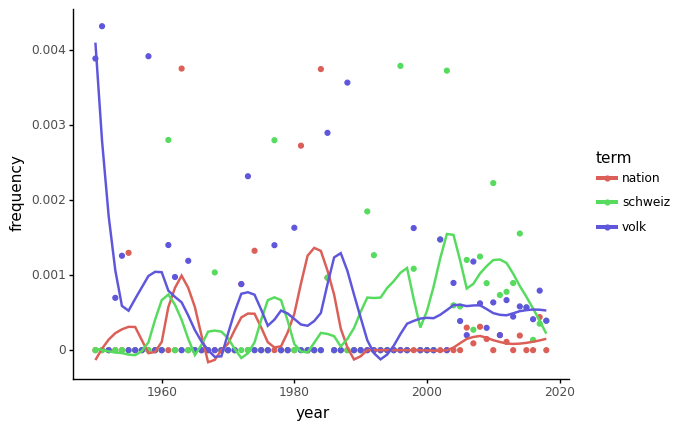

<ggplot: (8743266535403)>

In [98]:
# filter the dataset for the following terms
terms = ["volk", "schweiz", "nation"]
df_terms = df_tidy[df_tidy['term'].isin(terms)]

# plot the relative frequency for the terms above
(ggplot(df_terms, aes(x='year', y='frequency', color='term'))
 + geom_point() # show individual points
 + stat_smooth(method='loess', span=0.2, se=False) # overlay points with a smoothed line
 + theme_classic()) # make the plot look nicer

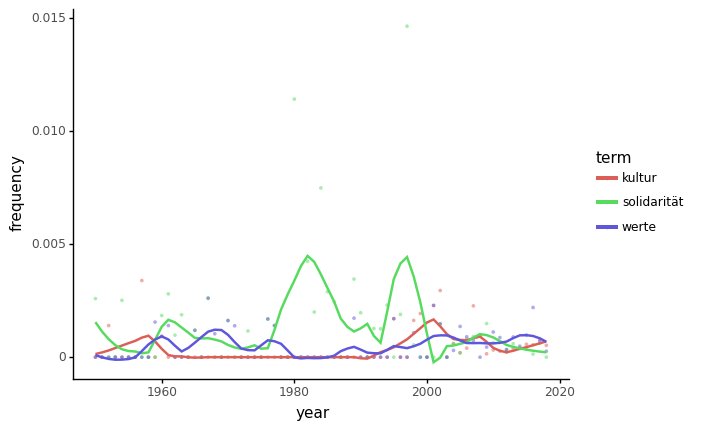

<ggplot: (8743265106101)>

In [99]:
# check some other terms
terms = ["solidarität", "kultur", "werte"]

df_terms = df_tidy[df_tidy['term'].isin(terms)]

(ggplot(df_terms, aes('year', 'frequency', color='term'))
 + geom_point(alpha=0.5, stroke = 0)
 + stat_smooth(method='loess', span=0.2, se=False)
 + theme_classic())

## Save Plot

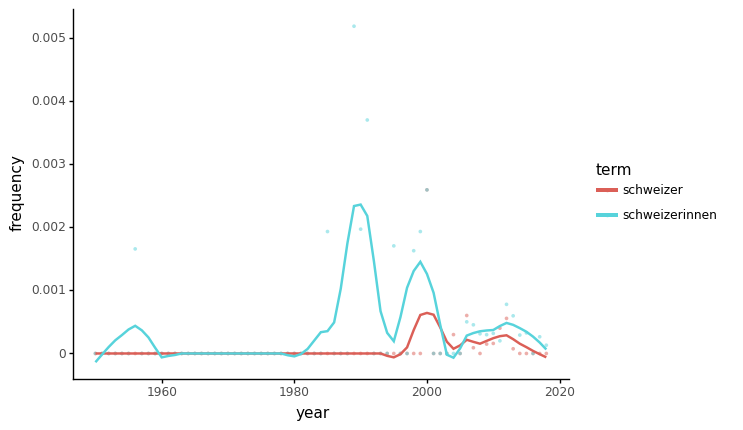

<ggplot: (8743265112167)>

In [100]:
# check some other terms
terms = ["schweizer", "schweizerinnen"]
df_terms = df_tidy[df_tidy['term'].isin(terms)]

p = (ggplot(df_terms, aes('year', 'frequency', color='term'))
 + geom_point(alpha=0.5, stroke = 0) # set transparency
 + stat_smooth(method='loess', span=0.2, se=False)
 + theme_classic())

# save as png
fname = '../analysis/rel_term_frq_gender.png'
p.save(filename=fname, dpi=150, verbose = False)
p

# Number of Documents per Year

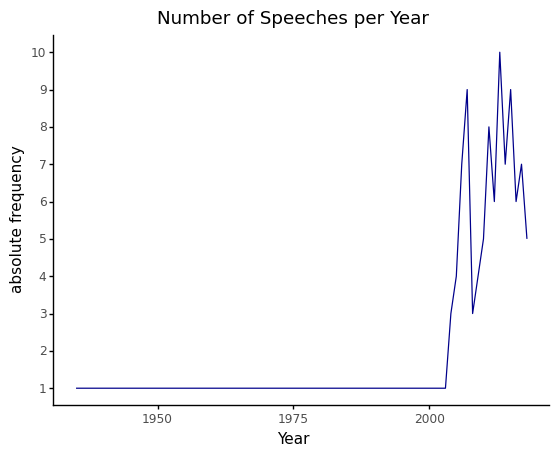

<ggplot: (8743266140808)>

In [101]:
docs_per_year = df_sub.groupby('Jahr').agg({'Text': "count" }).reset_index().rename(columns={'Text':'count'})

(ggplot(docs_per_year, aes(x='Jahr', y='count'))
 + geom_line(color='darkblue')
 +  labs(title = "Number of Speeches per Year", x = "Year", y = "absolute frequency")
 + scale_y_continuous(breaks=range(0, 12))
 + theme_classic())

# Working on Mini-Project

Ask questions, <br>
I am ready to help!

![Help!](../../lectures/images/help_frog.gif)


# In-class: Exercises I

1. Make sure that your local copy of the Github repository KED2022 is up-to-date with `git pull`. You can find the relevant material as follows:
- notebook `materials/code/KED2022_10.ipynb`
- dataset `materials/dataset_speeches_federal_council_2019.csv`.

2. Open the notebook in Jupyter Lab.

3. Playing around with the code is a good way to learn. Modify one thing, run the code, and see if the output matches your expectations. Start easy and then get brave until it breaks. Fix the issue and try again.

4. Come up with your own terms for the KWIC and the frequency plot.

5. Getting bored? Check out the documentation of the packages linked on the next slide.


# Resources

#### tutorials on spaCy

- [official spaCy 101](https://spacy.io/usage/spacy-101)
- [official online course spaCy](https://course.spacy.io/en/chapter1)
- [Hitchhiker's Guide to NLP in spaCy](https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy)